In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

df= pd.read_csv('/content/CHATGPT.csv')
df = df.rename(columns={'label': 'Label'})
df


,Review,Label
0,up to this point i ’ ve mostly been using chat...,NEGATIVE
1,i ’ ve been a user since it ’ s initial roll o...,NEGATIVE
2,this app would almost be perfect if it wasn ’ ...,NEGATIVE
3,"i recently downloaded the app and overall, it'...",POSITIVE
4,i appreciate the devs implementing siri suppor...,NEGATIVE
...,...,...
2287,this has to be a beginning to something crazy ...,NEGATIVE
2288,i ’ ve been using chat and have been a proud p...,POSITIVE
2289,the chatgpt ios app is an outstanding product....,POSITIVE
2290,sam altman ’ s blatant attempt at regulatory c...,NEGATIVE


In [3]:
import re
%pip install contractions
import contractions
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

for i in range(len(df)):
    # Convert to string to handle potential non-string values (like NaNs)
    review = str(df.loc[i, 'Review'])

    review = re.sub('[^a-zA-Z]', ' ', review)
    review = contractions.fix(review)
    review = review.lower()
    review = re.sub(r'\s+', ' ', review).strip()
    review = re.sub(r'#\S+', ' ', review)
    review = re.sub(r'@\S+', ' ', review)
    review = re.sub(r'http\S+|www\S+', ' ', review)
    review = re.sub(r'\d+', ' ', review)
    review = re.sub(r'\s+', ' ', review).strip()

    # 🔹 Fix: tokenize into words, remove stopwords, and join back
    review = " ".join(
        [word for word in review.split() if word not in stop_words]
    )
    df.loc[i, 'Review'] = review # Use .loc for assignment
df

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Label
0,point mostly using chatgpt windows desktop usi...,NEGATIVE
1,user since initial roll waiting mobile applica...,NEGATIVE
2,app would almost perfect one little thing sear...,NEGATIVE
3,recently downloaded app overall great platform...,POSITIVE
4,appreciate devs implementing siri support alre...,NEGATIVE
...,...,...
2287,beginning something crazy letting know since d...,NEGATIVE
2288,using chat proud premium subscriber awhile hel...,POSITIVE
2289,chatgpt ios app outstanding product seamless f...,POSITIVE
2290,sam altman blatant attempt regulatory capture ...,NEGATIVE


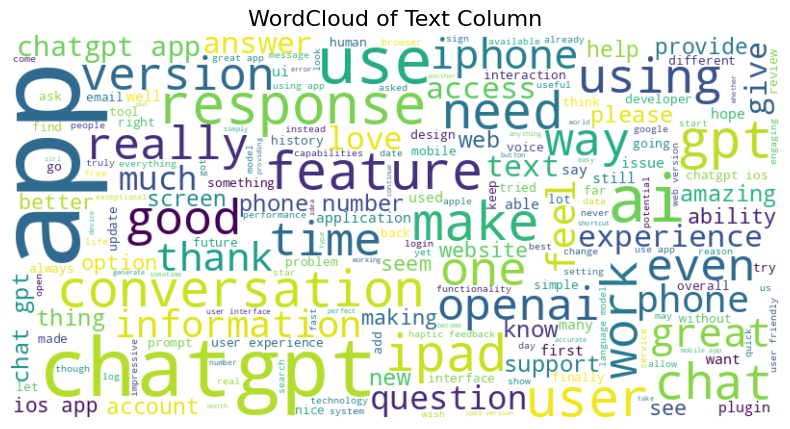

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text from the 'Text' column
text_data = ' '.join(df['Review'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes
plt.title("WordCloud of Text Column", fontsize=16)
plt.show()

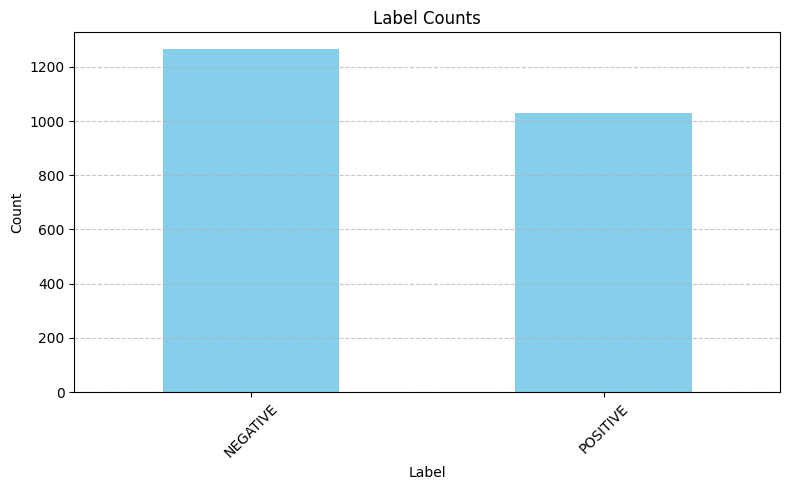

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
# Encode Labels
encoder = LabelEncoder()
df["Encoded_Label"] = encoder.fit_transform(df["Label"])
print("\n🔤 Encoded Labels (Negative=1, Postive=0):")
df


🔤 Encoded Labels (Negative=1, Postive=0):


,Review,Label,Encoded_Label
0,point mostly using chatgpt windows desktop usi...,NEGATIVE,0
1,user since initial roll waiting mobile applica...,NEGATIVE,0
2,app would almost perfect one little thing sear...,NEGATIVE,0
3,recently downloaded app overall great platform...,POSITIVE,1
4,appreciate devs implementing siri support alre...,NEGATIVE,0
...,...,...,...
2287,beginning something crazy letting know since d...,NEGATIVE,0
2288,using chat proud premium subscriber awhile hel...,POSITIVE,1
2289,chatgpt ios app outstanding product seamless f...,POSITIVE,1
2290,sam altman blatant attempt regulatory capture ...,NEGATIVE,0


In [7]:
print(df.columns)


Index(['Review', 'Label', 'Encoded_Label'], dtype='object')


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize Text
tokenizer = Tokenizer(num_words=None, oov_token="<OOV>")
tokenizer.fit_on_texts(df["Review"])

# i like nlp
# i hate someone very much

# Tokenization:

# i = 1, like = 2, nlp = 3, hate = 4, someone = 5, very = 6, much = 7

# [0, 0, 1, 2, 3]
# [1, 4, 5, 6, 7]

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df["Review"])
print("\n📜 Tokenized Sequences:\n", sequences)

# Pad sequences to have same length
max_length = max(len(seq) for seq in sequences)
X_padded = pad_sequences(sequences, maxlen=max_length, padding='pre')
print("\n📦 Padded Sequences Shape:", X_padded.shape)
print("\n📦 Padded Sequences:\n", X_padded)


📜 Tokenized Sequences:
 [[499, 1127, 13, 3, 1259, 215, 13, 143, 2228, 3148, 39, 1128, 1012, 248, 608, 215, 634, 27, 716, 9, 132, 31, 2229, 900, 1735, 94, 4, 242, 717, 1129, 45, 20, 824, 15, 2, 248, 36, 1260, 407, 98, 122, 27, 183, 2230, 533, 45, 635, 1130, 39, 1128, 573, 15, 1736, 3149, 140, 216, 8, 87, 668, 1013, 574, 17, 215, 2, 8, 475, 115, 344, 165, 825, 534, 3150, 47, 1261, 256, 1130, 1262, 367, 1263, 3, 71, 71, 1737, 1131, 47, 368, 71, 2231, 1130, 1495, 1263, 408, 636, 265, 320, 233, 8, 16, 46, 48, 3151, 2232, 234, 1495, 225, 826, 387, 189, 6, 72, 265, 328, 435, 288, 1014, 39, 2, 34, 76, 200, 25, 2233, 609, 72, 56, 637, 451, 2, 118], [9, 184, 1496, 2234, 266, 54, 77, 298, 184, 13, 18, 2, 1264, 388, 1132, 1265, 249, 250, 28, 125, 7, 1497, 102, 575, 118, 452, 28, 25, 26, 345, 637, 827, 3152, 2235, 251, 1738, 3153, 1739, 3154, 1739, 1498, 388, 1499, 576, 1499, 3155, 2236, 10, 7, 132, 159, 3156, 1133, 143, 1740, 321, 144, 42, 25, 154, 26, 11, 6, 18, 88, 320, 299, 163, 13, 54, 2, 184

In [9]:
# Features and Labels
X =  X_padded
y = df['Encoded_Label'].values

#  Split Data
X_train, X_test, y_train, y_test, text_train, text_test = train_test_split(
    X, y, df["Review"], test_size=0.2, random_state=42)

print("\n📏 Shape After Split:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


📏 Shape After Split:
X_train: (1833, 274) X_test: (459, 274)
y_train: (1833,) y_test: (459,)


In [10]:
#  Build ANN with Embedding Layer
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding token
vocab_size

5923

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

# ✅ Build Bidirectional LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=False)),  # BiLSTM with 32 units
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])


# ✅ Compile Bidirectional LSTM Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Build model with input shape
model.build(input_shape=(None, max_length))

# ✅ Show model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 274, 16)        │        94,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,369 (423.32 KB)

 Trainable params: 108,369 (423.32 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

# 6️⃣ Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=4, validation_split=0.2)

# Total Data = 50
# Train = 40 (32 Training (batch size = 4 => total batchs = 8) and 8 for validation)
# Test = 10

Epoch 1/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.5733 - loss: 0.6759 - val_accuracy: 0.7657 - val_loss: 0.5154
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.8424 - loss: 0.4079 - val_accuracy: 0.7956 - val_loss: 0.4748
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 80s 158ms/step - accuracy: 0.9287 - loss: 0.2022 - val_accuracy: 0.8093 - val_loss: 0.5265
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 83s 161ms/step - accuracy: 0.9618 - loss: 0.1021 - val_accuracy: 0.8011 - val_loss: 0.6806
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 81s 158ms/step - accuracy: 0.9731 - loss: 0.0858 - val_accuracy: 0.7847 - val_loss: 0.6856


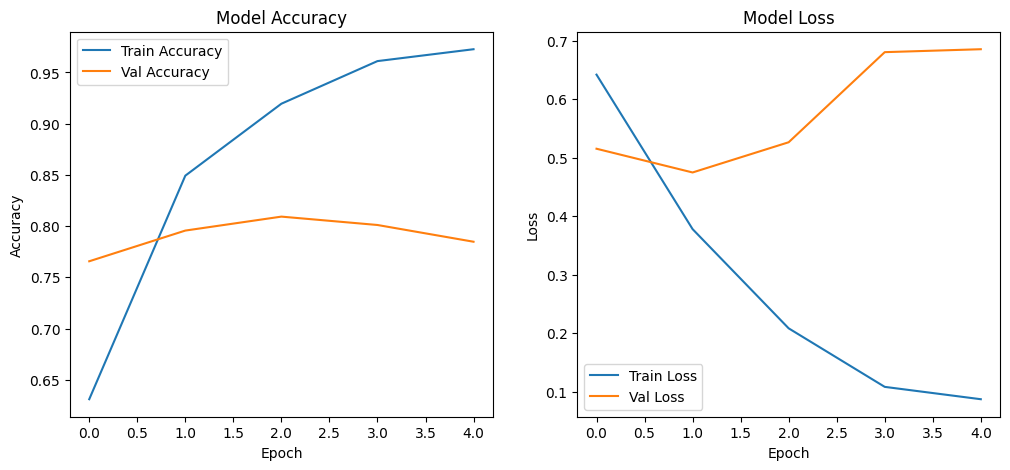

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
# 7️⃣ Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7773 - loss: 0.6948

✅ Test Accuracy: 0.76


In [15]:
pred = model.predict(X_test)
pred

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


array([[4.53129207e-04],
       [3.27392101e-01],
       [9.66964722e-01],
       [9.59843248e-02],
       [5.45721996e-05],
       [9.80032265e-01],
       [9.29451108e-01],
       [4.18789312e-03],
       [1.50650146e-03],
       [9.90629077e-01],
       [3.21744680e-01],
       [4.57259595e-01],
       [4.49731201e-03],
       [4.02002782e-03],
       [2.49040604e-04],
       [2.92746931e-01],
       [9.77021337e-01],
       [4.48411854e-04],
       [4.12634797e-02],
       [9.91789579e-01],
       [6.22507095e-01],
       [9.94508982e-01],
       [2.81650177e-03],
       [9.94157195e-01],
       [1.12145535e-05],
       [5.08696867e-05],
       [9.98625576e-01],
       [9.85322356e-01],
       [1.00666642e-01],
       [9.98920023e-01],
       [1.63542150e-04],
       [9.29451108e-01],
       [9.94748712e-01],
       [2.35875254e-04],
       [8.97174060e-01],
       [7.92979836e-01],
       [9.98518646e-01],
       [9.70091283e-01],
       [7.77389824e-01],
       [9.29451108e-01],


In [16]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Map encoded labels back to original
y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Get sequences and padded sequences for test set
test_sequences = tokenizer.texts_to_sequences(text_test)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Create DataFrame with all details
results_df = pd.DataFrame({
    "Text": text_test.values,
    "Tokenized Sequence": test_sequences,
    "Padded Sequence": list(test_padded_sequences),
    "Actual Label": y_test_labels,
    "Predicted Label": y_pred_labels
}).reset_index(drop=True)

print("\n📌 Results (Text | Tokenized Sequence | Padded Sequence | Actual | Predicted):")
results_df

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step

📌 Results (Text | Tokenized Sequence | Padded Sequence | Actual | Predicted):


,Text,Tokenized Sequence,Padded Sequence,Actual Label,Predicted Label
0,request invalid,"[202, 571]","[202, 571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NEGATIVE,NEGATIVE
1,running smoothly phone,"[556, 1037, 11]","[556, 1037, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",POSITIVE,NEGATIVE
2,like works well,"[6, 63, 45]","[6, 63, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",POSITIVE,POSITIVE
3,title said,"[494, 365]","[494, 365, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",NEGATIVE,NEGATIVE
4,chatgpt working always shows request invalid w...,"[3, 249, 119, 456, 202, 571, 1137, 254]","[3, 249, 119, 456, 202, 571, 1137, 254, 0, 0, ...",NEGATIVE,NEGATIVE
...,...,...,...,...,...
454,lol love hear story led implementing haptic fe...,"[988, 21, 1131, 530, 2603, 1507, 112, 72, 853,...","[988, 21, 1131, 530, 2603, 1507, 112, 72, 853,...",NEGATIVE,POSITIVE
455,entertaining using app within minutes iphone b...,"[1515, 13, 2, 288, 540, 30, 892, 151, 1020, 20...","[1515, 13, 2, 288, 540, 30, 892, 151, 1020, 20...",NEGATIVE,NEGATIVE
456,says personal phone number premium number need...,"[199, 181, 11, 40, 509, 40, 37, 5, 110, 22, 25...","[199, 181, 11, 40, 509, 40, 37, 5, 110, 22, 25...",NEGATIVE,NEGATIVE
457,chinese use,"[666, 5]","[666, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",NEGATIVE,NEGATIVE


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
# 📊 Classification Report
print("\n📑 Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


📑 Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.82      0.73      0.77       251
    POSITIVE       0.71      0.81      0.76       208

    accuracy                           0.76       459
   macro avg       0.77      0.77      0.76       459
weighted avg       0.77      0.76      0.77       459




 Confusion Matrix:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


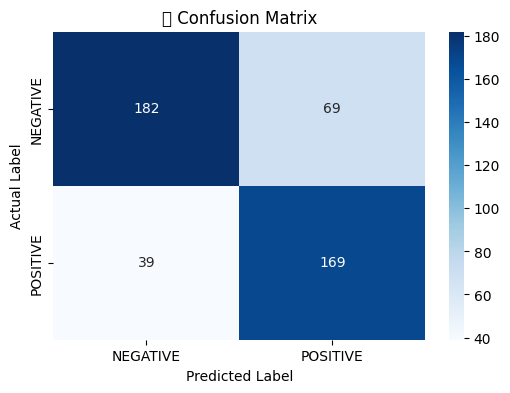

In [18]:
import seaborn as sns
# 📊 Confusion Matrix
print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# 🎨 Confusion Matrix (Visual)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("🔵 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()